In [13]:
# Importowanie potrzebnych bibliotek
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.optimizers import Adam

In [14]:
# Generowanie danych
x = np.linspace(-10, 10, 1000)
y = x**2

In [15]:
# Podział danych na treningowe i testowe
x_train = x[:800]
y_train = y[:800]
x_test = x[800:]
y_test = y[800:]

In [16]:
# Przekształcanie danych wejściowych na kolumny wektorów
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [17]:
# Budowanie modelu sieci neuronowej
model = Sequential([
    Dense(50, input_dim=1, activation=relu),
    Dense(50, activation=relu),
    Dense(1, activation=linear)
])

In [18]:
# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [19]:
# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/200
25/25 [==============================] - 2s 30ms/step - loss: 604.5896 - val_loss: 786.8146
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 130.4917 - val_loss: 914.6926
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 87.0694 - val_loss: 796.3806
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 66.4344 - val_loss: 652.6029
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 49.6116 - val_loss: 543.4807
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 32.8515 - val_loss: 476.1623
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 20.3144 - val_loss: 366.3071
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 14.0706 - val_loss: 361.2003
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 7.7183 - val_loss: 292.5346
Epoch 10/200
25/25 [==============================] - 0s 5ms/step - loss: 5.3382

In [20]:
# Predykcja na danych testowych
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


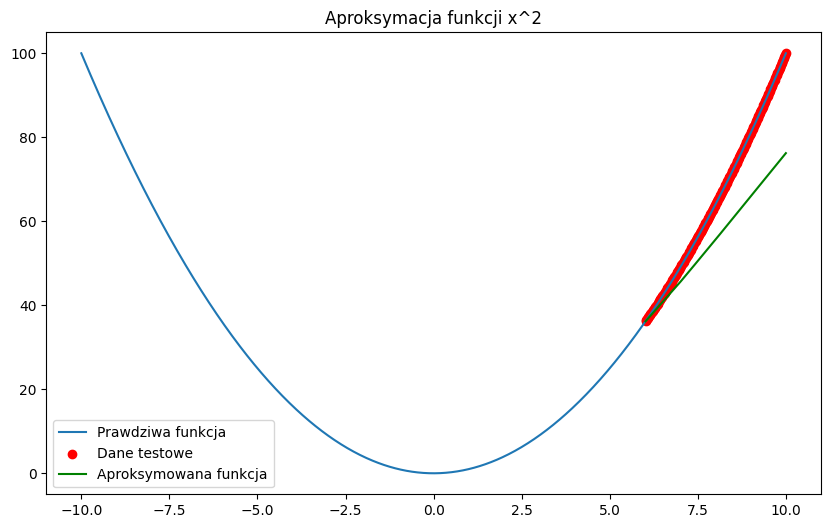

In [21]:
# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Prawdziwa funkcja')
plt.scatter(x_test, y_test, label='Dane testowe', color='red')
plt.plot(x_test, y_pred, label='Aproksymowana funkcja', color='green')
plt.legend()
plt.title('Aproksymacja funkcji x^2')
plt.show()

#Klasyfikacja


In [34]:
# Importowanie potrzebnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [35]:
# Generowanie syntetycznego zbioru danych
np.random.seed(42)
num_samples = 1000

In [36]:
# Generowanie cech
ratings = np.random.uniform(1, 10, num_samples)  # oceny w skali od 1 do 10
num_players = np.random.randint(1, 1001, num_samples)  # liczba graczy
platforms = np.random.choice(['PC', 'Console', 'Mobile'], num_samples)  # platformy

In [37]:
# Generowanie etykiet gatunków
genres = np.random.choice(['Action', 'Adventure', 'Puzzle', 'Strategy'], num_samples)

In [38]:
# Tworzenie DataFrame
data = pd.DataFrame({
    'Rating': ratings,
    'NumPlayers': num_players,
    'Platform': platforms,
    'Genre': genres
})

In [39]:
# Kodowanie zmiennych kategorycznych
label_encoder = LabelEncoder()
data['Platform'] = label_encoder.fit_transform(data['Platform'])
data['Genre'] = label_encoder.fit_transform(data['Genre'])

In [40]:
# Podział danych na cechy i etykiety
X = data.drop('Genre', axis=1)
y = data['Genre']

In [41]:
# Skalowanie cech
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Budowanie modelu sieci neuronowej
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # 4 klasy wyjściowe dla 4 gatunków
])

In [44]:
# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 2s 11ms/step - loss: 1.4037 - accuracy: 0.2637 - val_loss: 1.3875 - val_accuracy: 0.2550
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.4039 - accuracy: 0.2313 - val_loss: 1.3909 - val_accuracy: 0.2400
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 1.3883 - accuracy: 0.2637 - val_loss: 1.3921 - val_accuracy: 0.2400
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 1.3853 - accuracy: 0.2637 - val_loss: 1.3962 - val_accuracy: 0.2300
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3880 - accuracy: 0.2837 - val_loss: 1.3982 - val_accuracy: 0.2100
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3834 - accuracy: 0.2812 - val_loss: 1.4015 - val_accuracy: 0.2400
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 1.3802 - accuracy: 0.2850 - val_loss: 1.4038 - val_accuracy: 0.1950
Epoch 8/50
25/25 [=

In [46]:
# Ocena modelu
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 1.4159 - accuracy: 0.2000
Test Accuracy: 20.00%


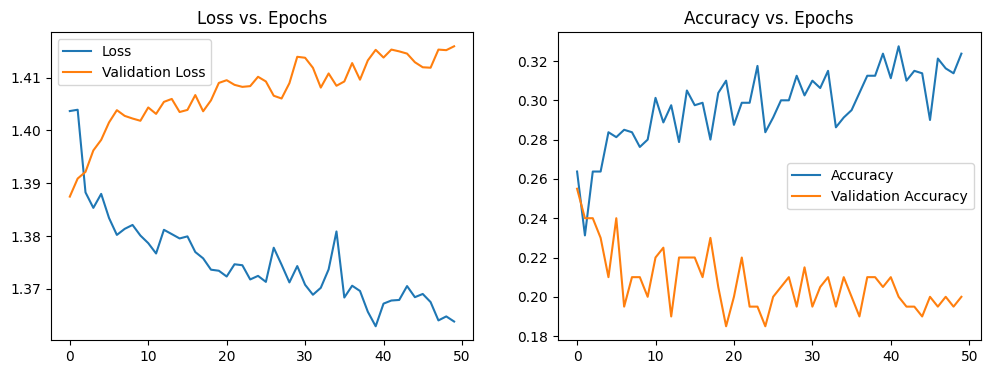

In [47]:
# Wizualizacja historii treningu
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()